# DS 3000 - Assignment [8]

**Student Name**: [Jacob Benesch, Vidushi Misra, Nuo Xu, Brian Wong]

**Date**: [2/24/2025]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

___________________________________________________________________________



Question 1 — The DS Problem

In your own words, formulate the Data Science problem that you were given.

Our data science problem is to identify patterns and factors related to wildlife aircraft strikes. We will use the FAA Wildlife Database to accomplish this. We hope to focus on trends in this database such as wildlife populations or environmental changes and use statistical tests and visualizations to create insights that will be helpful in painting a story with our data.

Question 2 — Clean the data (10 pts)

Load the data using pandas and inspect it.

1. Perform the initial inspection of the data, its shape, types, etc.
2. Evaluate the dataset and perform at least three type of data preparation and justify the approach that is taken to prepare the data for analysis. Data prep can include, but is not limited to: handling missing values, data types, duplicates, etc. You will need to ensure that your data preparation addressed issues in at least 7 fields in the data.
3. Prepare meaningful* summary statistics for 3 continuous variables and 3 categorical variables.
Note: meaningful summary statistics explains the statistical summary of relevant fields in a coherent manner.

In [1]:
import pandas as pd
import gdown

file_id = "1T0lYAM28_BU5Mwq87YQCuu5k0ztIy59z"
output = "Bird_Strikes_1990_2023.csv"

gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}",
               output, quiet=False)

df = pd.read_csv(output)
df.head()

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1T0lYAM28_BU5Mwq87YQCuu5k0ztIy59z
From (redirected): https://drive.google.com/uc?export=download&id=1T0lYAM28_BU5Mwq87YQCuu5k0ztIy59z&confirm=t&uuid=af5230d9-9776-44ee-a88f-fcaad92f1cb7
To: /content/Bird_Strikes_1990_2023.csv
100%|██████████| 195M/195M [00:02<00:00, 77.0MB/s]
<ipython-input-1-0fe9a4bae837>:10: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(output)


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,...,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/1996,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,...,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
1,608243,6/26/1996,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,...,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
2,608244,7/1/1996,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,...,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
3,608245,7/1/1996,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,...,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False
4,608246,7/1/1996,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,...,Medium,NaN,NaN,/Legacy Record=100005/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/2007,False


In [2]:
#First, we drop columns that we won't need for the assignment
df.drop(columns=[
    'INDEX_NR', 'OPID', 'FLT', 'OPERATOR', 'AMA', 'AMO', 'EMA', 'EMO', 'AC_MASS', 'NUM_ENGS', 'TYPE_ENG',
    'ENG_1_POS', 'ENG_2_POS', 'ENG_3_POS', 'ENG_4_POS', 'REG', 'REMAINS_COLLECTED', 'REMAINS_SENT',
    'AIRPORT_ID', 'RUNWAY', 'STR_RAD', 'DAM_RAD', 'STR_WINDSHLD', 'DAM_WINDSHLD', 'STR_NOSE', 'DAM_NOSE',
    'STR_ENG1', 'DAM_ENG1', 'ING_ENG1', 'STR_ENG2', 'DAM_ENG2', 'ING_ENG2', 'STR_ENG3', 'DAM_ENG3', 'ING_ENG3',
    'STR_ENG4', 'DAM_ENG4', 'ING_ENG4', 'INGESTED_OTHER', 'STR_PROP', 'DAM_PROP','STR_WING_ROT', 'DAM_WING_ROT', 'STR_FUSE', 'DAM_FUSE', 'STR_LG', 'DAM_LG',
    'STR_TAIL', 'DAM_TAIL', 'STR_LGHTS', 'DAM_LGHTS', 'STR_OTHER', 'DAM_OTHER', 'OTHER_SPECIFY','SKY'], inplace=True)
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())


#Data Cleaning
#First we drop columns with an extremely high number of null values
df.drop(columns=["BIRD_BAND_NUMBER", "AOS", "PRECIPITATION", "ENROUTE_STATE","COST_REPAIRS", "COST_OTHER","COST_REPAIRS_INFL_ADJ", "COST_OTHER_INFL_ADJ", "EFFECT", "EFFECT_OTHER", "NUM_SEEN", "NR_INJURIES", "NR_FATALITIES"], inplace=True)

#Next, we converted some categorical columns to category or datetime
df["DAMAGE_LEVEL"] = df["DAMAGE_LEVEL"].astype("category")
df["INCIDENT_DATE"] = pd.to_datetime(df["INCIDENT_DATE"])

#We can also remove any rows that are exact duplicates of each other, an event would not happen at the exact same time
df.drop_duplicates(inplace=True)

#Next, we pull up our summary stats
cols = ["HEIGHT", "SPEED", "DISTANCE"]
summary_cont = df[cols].describe()
print("Summary Statistics for Continuous:")
print(summary_cont)


for col in ["PHASE_OF_FLIGHT", "DAMAGE_LEVEL", "SPECIES"]:
    print(f"Frequency Count for {col}:")
    print(df[col].value_counts())


INCIDENT_DATE             object
INCIDENT_MONTH             int64
INCIDENT_YEAR              int64
TIME                      object
TIME_OF_DAY               object
AIRPORT                   object
LATITUDE                 float64
LONGITUDE                float64
STATE                     object
FAAREGION                 object
LOCATION                  object
ENROUTE_STATE             object
AIRCRAFT                  object
AC_CLASS                  object
PHASE_OF_FLIGHT           object
HEIGHT                   float64
SPEED                    float64
DISTANCE                 float64
PRECIPITATION             object
AOS                      float64
COST_REPAIRS              object
COST_OTHER                object
COST_REPAIRS_INFL_ADJ     object
COST_OTHER_INFL_ADJ       object
INDICATED_DAMAGE            bool
DAMAGE_LEVEL              object
EFFECT                    object
EFFECT_OTHER              object
BIRD_BAND_NUMBER         float64
SPECIES_ID                object
SPECIES   

From our statistical summary, we can see a variety of important things. First off, looking at our continious data summaries, we can see there is a significantly more amount of data in the Distance section then Speed and Height. This could be attributed to error, or because some accidents happen on the ground. The other statistics just provide ranges and other statistics of where most heights, speeds, and distances of accidents occur. One thing to notice is the maximum speed was 1250 knots - this would be extremely high, and is most likely a data error. Moving on to Categorical, we can see the most common phase of flight of an accident is approach or landing. This makes sense as landing is most prone to pilot error. Additionally, we can see None is the most common phase of damage - this makes sense as most accidents are very minor, only the few we hear about on the news are major. Overall, the categorical summary stats tell us a lot about what the most frequent type of accident could be - it is definetly something to look at in the future.

In [3]:
print(df.dtypes)
print(df.shape)

INCIDENT_DATE       datetime64[ns]
INCIDENT_MONTH               int64
INCIDENT_YEAR                int64
TIME                        object
TIME_OF_DAY                 object
AIRPORT                     object
LATITUDE                   float64
LONGITUDE                  float64
STATE                       object
FAAREGION                   object
LOCATION                    object
AIRCRAFT                    object
AC_CLASS                    object
PHASE_OF_FLIGHT             object
HEIGHT                     float64
SPEED                      float64
DISTANCE                   float64
INDICATED_DAMAGE              bool
DAMAGE_LEVEL              category
SPECIES_ID                  object
SPECIES                     object
REMARKS                     object
WARNED                      object
NUM_STRUCK                  object
SIZE                        object
COMMENTS                    object
REPORTED_NAME               object
REPORTED_TITLE              object
SOURCE              

Question 3 — Perform Exploratory Data Analysis (40 pts)

Perform an in-depth analysis by creating visualizations to understand the distribution and relationships within the data, while ensuring that your analysis and explanation of the results tell a story. It's important to select appropriate visualizations based on the type of data. Explain all results.

1. Analyze the proportion of incidents that occur each year.
2. Evaluate the distribution of bird strikes in each state and display the top 20 states.
3. What is the most common bird species that are involved in bird strikes.
4. Perform a comparative analysis of the annual aircraft damage for each phase of flight. Evaluate the results over the last 10 years to determine what patterns exist. Note: this requires a year over year analysis.
5. Analyze the frequency of bird strike incidents that occur on a monthly basis over the last 10 years. Analyze the results to determine when these incidents are more prevalent.  This question requires you to drill deeper into the analysis to determine if the distribution has changed over the last 10 years. Note: this requires a year over year analysis.
6. Perform ONE (1) additional analysis on the distribution. Ensure that you either : 1) perform a comparative analysis by evaluating 3 or more groups within the data or 2) perform a temporal analysis of the patterns over 10 or more years (this requires a year over year analysis of the patterns). Do not repeat any of the previous analysis.

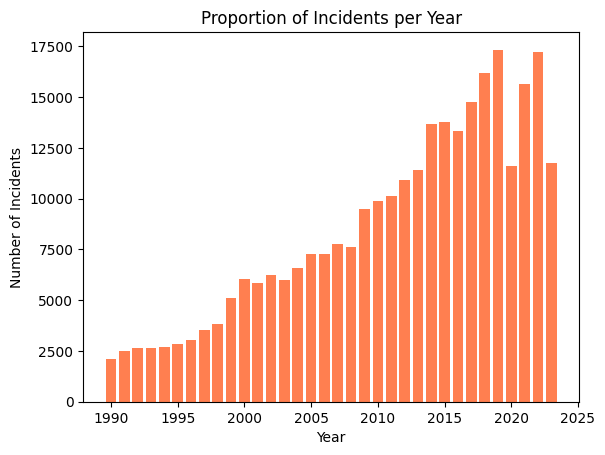

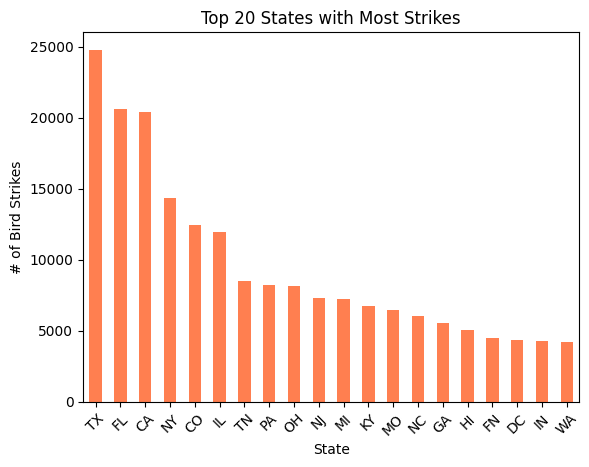

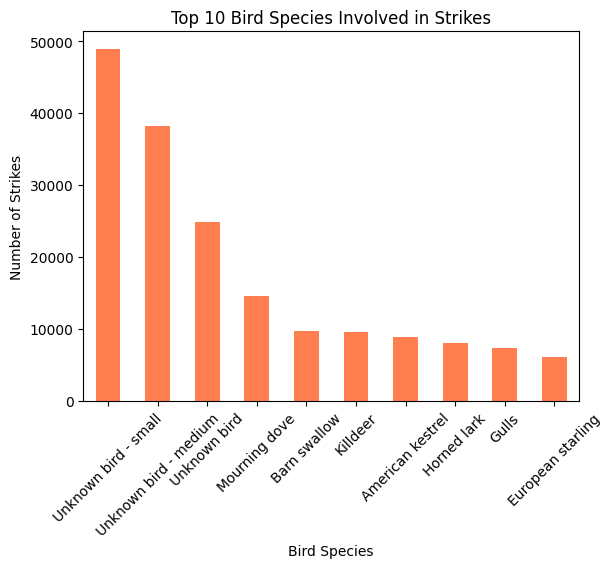

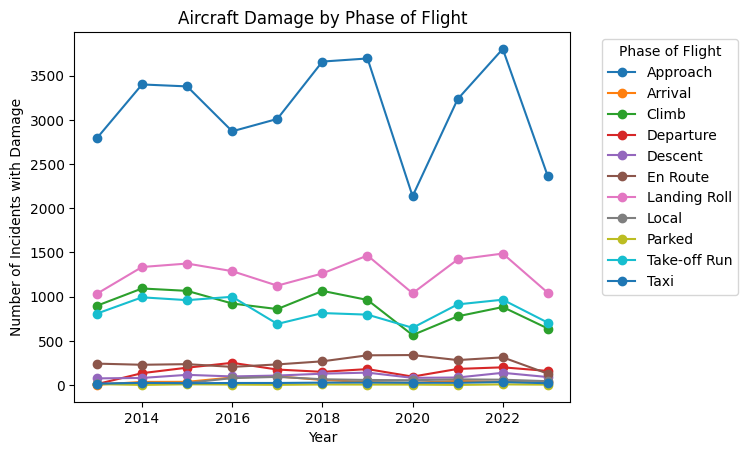

<Figure size 1200x600 with 0 Axes>

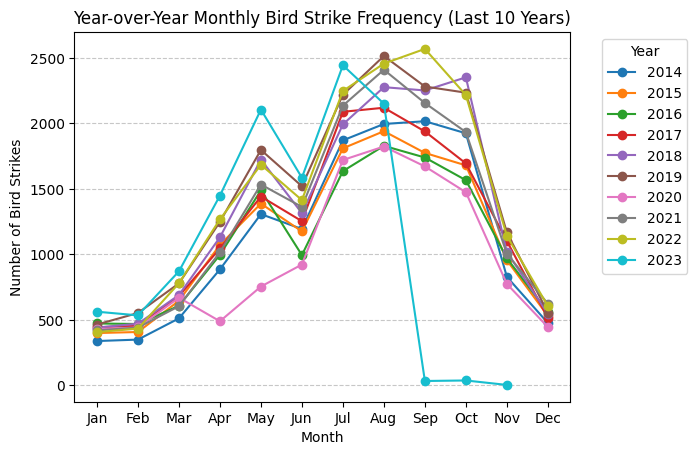

Monthly bird strike frequency summary over the last 10 years:
INCIDENT_MONTH          1           2           3            4            5   \
count            10.000000   10.000000   10.000000    10.000000    10.000000   
mean            437.300000  455.000000  683.400000  1059.600000  1521.900000   
std              57.950266   58.151144  103.540867   257.488382   356.568663   
min             338.000000  349.000000  511.000000   489.000000   754.000000   
25%             409.250000  435.000000  616.500000  1001.000000  1400.500000   
50%             435.000000  448.000000  675.500000  1058.500000  1510.500000   
75%             458.750000  469.500000  755.750000  1218.500000  1713.250000   
max             562.000000  552.000000  870.000000  1448.000000  2105.000000   

INCIDENT_MONTH          6            7            8            9   \
count             10.00000    10.000000    10.000000    10.000000   
mean            1273.20000  2015.700000  2151.000000  1842.600000   
std       

<Figure size 1200x600 with 0 Axes>

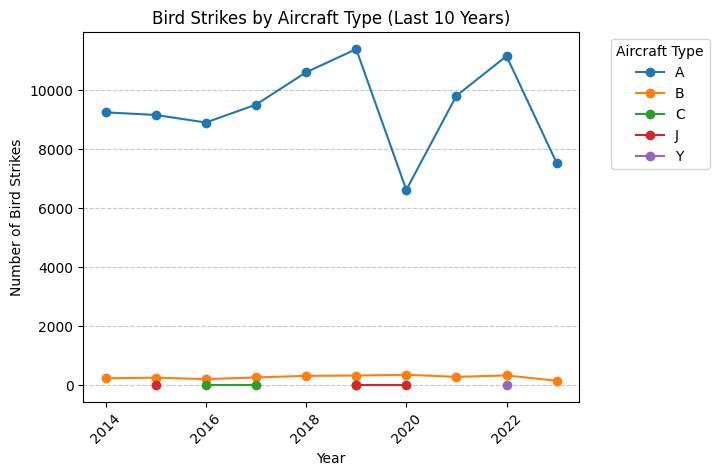

Bird strike statistics for top 5 aircraft types over the last 10 years:
AC_CLASS            A          B    C    J    Y
count        10.00000   10.00000  3.0  3.0  1.0
mean       9400.90000  269.70000  1.0  1.0  2.0
std        1499.91692   63.71996  0.0  0.0  NaN
min        6624.00000  148.00000  1.0  1.0  2.0
25%        8974.00000  236.25000  1.0  1.0  2.0
50%        9386.00000  270.50000  1.0  1.0  2.0
75%       10414.75000  323.00000  1.0  1.0  2.0
max       11401.00000  352.00000  1.0  1.0  2.0


In [4]:
import matplotlib.pyplot as plt

#3.1: Graph of proportion of incidents per year
incidents_per_year = df["INCIDENT_YEAR"].value_counts().sort_index()

plt.bar(incidents_per_year.index, incidents_per_year.values, color="coral")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Proportion of Incidents per Year")
plt.show()

#3.2: Distribution of bird strikes in each states
state_counts = df["STATE"].value_counts().head(20)

state_counts.plot(kind="bar", color="coral")
plt.xlabel("State")
plt.ylabel("# of Bird Strikes")
plt.title("Top 20 States with Most Strikes")
plt.xticks(rotation=45)
plt.show()

#3.3: Most common species
species_counts = df["SPECIES"].value_counts().head(10)
species_counts.plot(kind="bar", color="coral")
plt.xlabel("Bird Species")
plt.ylabel("Number of Strikes")
plt.title("Top 10 Bird Species Involved in Strikes")
plt.xticks(rotation=45)
plt.show()

#3.4: Annual Aircraft Damage
recent_years = df[df["INCIDENT_YEAR"] >= (df["INCIDENT_YEAR"].max() - 10)]
damage_by_phase = recent_years.groupby(["INCIDENT_YEAR", "PHASE_OF_FLIGHT"])["DAMAGE_LEVEL"].count().unstack()

damage_by_phase.plot(kind="line", marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Incidents with Damage")
plt.title("Aircraft Damage by Phase of Flight")
plt.legend(title="Phase of Flight", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#3.5
# Ensure 'INCIDENT_YEAR' and 'INCIDENT_MONTH' are numeric
df['INCIDENT_YEAR'] = pd.to_numeric(df['INCIDENT_YEAR'], errors='coerce')
df['INCIDENT_MONTH'] = pd.to_numeric(df['INCIDENT_MONTH'], errors='coerce')

# Get the latest year in the dataset and filter the last 10 years
latest_year = df['INCIDENT_YEAR'].max()
df_last_10_years = df[df['INCIDENT_YEAR'] >= latest_year - 9]

# Group by year and month, count the number of incidents
monthly_counts = df_last_10_years.groupby(['INCIDENT_YEAR', 'INCIDENT_MONTH']).size().unstack()

# Plot the trend of bird strikes per month over the last 10 years
plt.figure(figsize=(12, 6))
monthly_counts.T.plot(marker='o')

# Title and labels
plt.title("Year-over-Year Monthly Bird Strike Frequency (Last 10 Years)")
plt.xlabel("Month")
plt.ylabel("Number of Bird Strikes")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(1, 13),
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Print summary statistics
print("Monthly bird strike frequency summary over the last 10 years:")
print(monthly_counts.describe())

#3.6
# Ensure 'INCIDENT_YEAR' is numeric
df['INCIDENT_YEAR'] = pd.to_numeric(df['INCIDENT_YEAR'], errors='coerce')

# Get the latest year and filter the last 10 years
latest_year = df['INCIDENT_YEAR'].max()
df_last_10_years = df[df['INCIDENT_YEAR'] >= latest_year - 9]

# Select top 5 most frequently struck aircraft types
top_aircraft = df_last_10_years['AC_CLASS'].value_counts().nlargest(5).index

# Filter data to include only the top 5 aircraft types
df_filtered = df_last_10_years[df_last_10_years['AC_CLASS'].isin(top_aircraft)]

# Group by year and aircraft type, count bird strikes
aircraft_strikes = df_filtered.groupby(['INCIDENT_YEAR', 'AC_CLASS']).size().unstack()

# Plot year-over-year bird strike trends for top aircraft types
plt.figure(figsize=(12, 6))
aircraft_strikes.plot(marker='o')

# Title and labels
plt.title("Bird Strikes by Aircraft Type (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Number of Bird Strikes")
plt.legend(title="Aircraft Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Print summary statistics for each aircraft type
print("Bird strike statistics for top 5 aircraft types over the last 10 years:")
print(aircraft_strikes.describe())


Our first graph shows a steady increase in accidents as time goes on, with a drop off in 2020. This checks out with general world trends, as air travel has increased in popularity overtime, but severly decreased during COVID. Therefore, this graph reiterates the linear connection between air travel and air accidents.

The second graph shows Texas, Florida, and California have the most bird strikes of any states. This makes sense as they are three of the most populated states in the country and would naturally have the most flights.

Our third graph shows unknown small birds are the most common bird types involved in strikes. This may seem like a data error, but we belive this occurs as many birds are shredded up in engines so investigators cannot determine what kind of bird they are. This is why it is important to consider context such as this when analyzing data.

Our fourth graph shows the most common damage phase is Approach. This checks out with our general knowledge of the aviation sector - since landing is the time most prone to error in a flight. The overall trajectory of the graph is in line with general aviation trends, as there is a steep drop off in 2020 for all accident types but otherwise relatively stable.

3.5 Analysis
### Key Findings  

1. **Most bird strikes happen from May to October**  
   - Peaks in **July and August**, probably due to migration and more flights.  
   - October also has high incidents, likely from fall migration.  

2. **Winter months (Nov–Feb) have the fewest strikes**  
   - **January and February** are the lowest, likely because birds are less active in cold weather.  

3. **Yearly trends stay pretty consistent**  
   - Some years have bigger summer spikes, but the pattern is stable.  
   - **August 2020 is way lower than usual**, likely due to fewer flights during the pandemic.  

### Why This Happens  

- **Bird migration** – more birds in the air during spring and fall.  
- **More flights in summer** – vacation season means more planes in the sky.  
- **Weather** – cold months slow bird movement, so fewer strikes.  

### Takeaways  

- Airports should **focus on bird control from May to October**.  
- Tracking migration patterns could help predict high-risk months.  
- The **2020 dip** shows how outside events (like COVID-19) affect bird strikes.  

3.6 Analysis
### Key Findings  

1. **One aircraft type (A) dominates bird strikes**  
   - Aircraft **A** has far more bird strikes than any other type, averaging around **9,401 strikes per year**.  
   - Other aircraft types (B, C, J, Y) have **very few strikes** in comparison.  

2. **Yearly Trends for Aircraft A**  
   - Bird strikes **increased over time**, peaking around **2019 and 2022**.  
   - **2020 shows a sharp drop**, likely due to fewer flights during the pandemic.  
   - Even with fluctuations, aircraft **A consistently has the highest risk**.  

3. **Other Aircraft Types Have Minimal Impact**  
   - Aircraft **B sees some variation but is still relatively low** (mean: **269 strikes per year**).  
   - Aircraft **C, J, and Y have almost no incidents**, suggesting they either fly less or have better bird strike prevention.  

### Why This Happens  

- **Aircraft A is likely a high-traffic commercial plane**, meaning it’s in the air more often, increasing strike chances.  
- **Bigger aircraft may have a higher risk** due to larger engines and flight patterns.  
- **Pandemic-related flight reductions (2020) led to fewer bird strikes overall.**  

### What This Means  

- **Aircraft A needs better bird strike mitigation**, like improved airport bird control measures.  
- **Other aircraft types show little risk**, so resources should focus on high-risk planes.  
- **Trends suggest bird strikes will keep increasing unless action is taken.**  


Question 4 — Hypothesis Testing (30 points)

Perform pairwise analysis of select features and evaluate the significance of the pattern or trend. A suitable value for alpha is 5%. Explain all results.

1. Create a scatterplot that shows the relationship between aircraft height and speed. Evaluate the correlation, the strength and the significance of the results.
2. Visualize the distribution of the aircraft speed during: 1) the approach phase of flight and 2) the landing roll phase of flight. Perform a 2 sample t-test and evaluate if there is a statistical difference between the speed during these two flight phases. Tip: if the data is skewed, you will need to address this prior to the statistical analysis.
3. Create a visualization of the aircraft damage grouped by phase of flight.
Part 1) Evaluate if the results are statistically significant. Ensure that you use the appropriate test.
4. Perform ONE (1) additional statistical test.
Part 1) Explain what you are testing and the reason this information is useful.
Part 2) Visualize the data, state the hypothesis and explain if it is statistically significant.

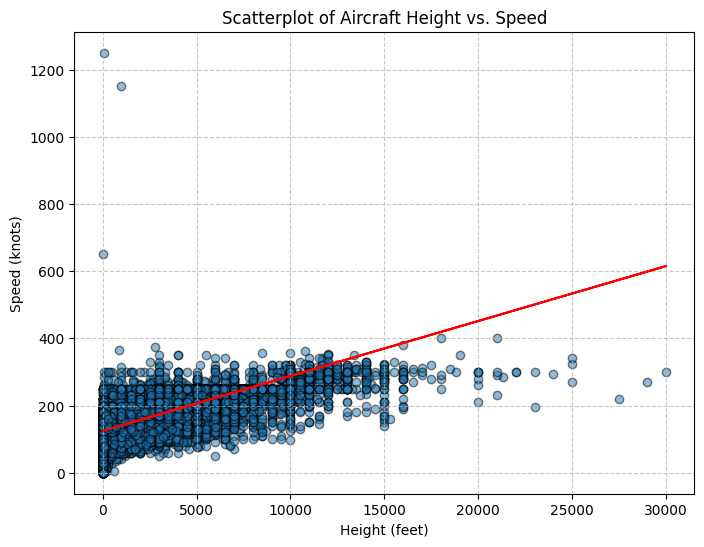

Pearson Correlation Coefficient: 0.70
P-value: 0.00
The correlation is statistically significant (p < 0.05).


In [5]:
#4.1
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Ensure 'HEIGHT' and 'SPEED' are numeric
df['HEIGHT'] = pd.to_numeric(df['HEIGHT'], errors='coerce')
df['SPEED'] = pd.to_numeric(df['SPEED'], errors='coerce')

# Drop rows with missing values in HEIGHT or SPEED
df_clean = df.dropna(subset=['HEIGHT', 'SPEED'])

# Compute Pearson correlation and p-value
correlation, p_value = stats.pearsonr(df_clean['HEIGHT'], df_clean['SPEED'])

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['HEIGHT'], df_clean['SPEED'], alpha=0.5, edgecolors='k')

# Fit a trend line
m, b = np.polyfit(df_clean['HEIGHT'], df_clean['SPEED'], 1)
plt.plot(df_clean['HEIGHT'], m * df_clean['HEIGHT'] + b, color='red')

# Titles and labels
plt.title("Scatterplot of Aircraft Height vs. Speed")
plt.xlabel("Height (feet)")
plt.ylabel("Speed (knots)")
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()

# Print correlation results
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

# Check significance
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant (p < 0.05).")
else:
    print("The correlation is NOT statistically significant (p ≥ 0.05).")

### Key Findings  

1. **Positive Correlation (r = 0.70)**  
   - The Pearson correlation coefficient is **0.70**, meaning there is a **moderate to strong positive correlation**.  
   - As **aircraft height increases, speed also tends to increase**.  

2. **Statistical Significance (p < 0.0001)**  
   - The **p-value is extremely low (0.00)**, meaning the correlation is **statistically significant** at the 5% level (p < 0.05).  
   - This confirms that the relationship between height and speed is **not due to random chance**.  

3. **Scatterplot Insights**  
   - The **red trend line** shows a clear upward trend.  
   - Most data points cluster at **lower altitudes (below 10,000 feet)** with speeds ranging from **100 to 300 knots**.  
   - At higher altitudes, speeds vary more, but the overall trend still holds.  

### Why This Happens  

- Aircraft **naturally gain speed as they climb** to cruising altitude.  
- **Higher altitudes mean thinner air**, reducing drag and allowing faster speeds.  
- Some variations may be due to **different aircraft types** and **flight phases (e.g., takeoff vs. cruise)**.  

### Takeaways  

- The **height-speed relationship is strong and statistically significant**.  
- This pattern is expected in aviation and aligns with real-world aircraft performance.  
- Further analysis could explore **differences by aircraft type or flight phase** to refine insights.  

Skewness of Approach Speed: 1.45
Skewness of Landing Roll Speed: -0.61


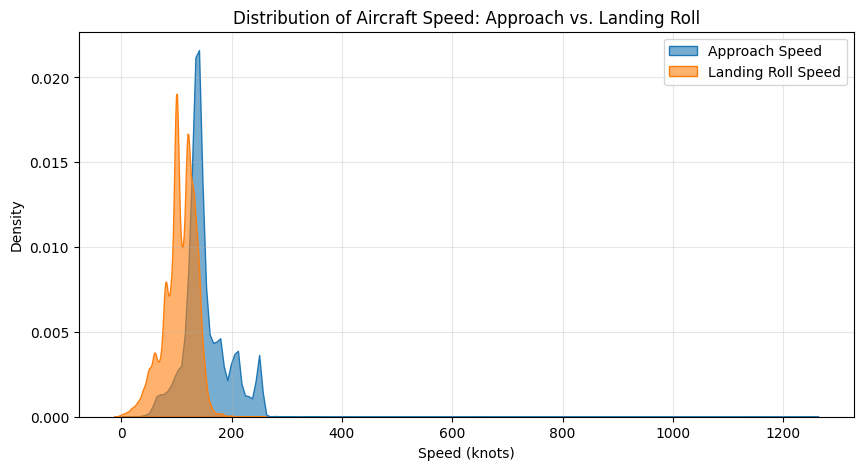

T-statistic: -386.71
P-value: 0.00
There is a significant difference in speed between Approach and Landing Roll phases (p < 0.05).


In [6]:
import seaborn as sns
#4.2
# Ensure 'SPEED' and 'PHASE_OF_FLIGHT' are properly formatted
df['SPEED'] = pd.to_numeric(df['SPEED'], errors='coerce')

# Filter data for the two flight phases
approach_speeds = df[df['PHASE_OF_FLIGHT'] == 'Approach']['SPEED'].dropna()
landing_roll_speeds = df[df['PHASE_OF_FLIGHT'] == 'Landing Roll']['SPEED'].dropna()

# Check for skewness
print(f"Skewness of Approach Speed: {approach_speeds.skew():.2f}")
print(f"Skewness of Landing Roll Speed: {landing_roll_speeds.skew():.2f}")

# Plot distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(approach_speeds, label="Approach Speed", fill=True, alpha=0.6)
sns.kdeplot(landing_roll_speeds, label="Landing Roll Speed", fill=True, alpha=0.6)

# Titles and labels
plt.title("Distribution of Aircraft Speed: Approach vs. Landing Roll")
plt.xlabel("Speed (knots)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# Apply log transformation if highly skewed
if abs(approach_speeds.skew()) > 1:
    approach_speeds = np.log1p(approach_speeds)
if abs(landing_roll_speeds.skew()) > 1:
    landing_roll_speeds = np.log1p(landing_roll_speeds)

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(approach_speeds, landing_roll_speeds, equal_var=False)

# Print t-test results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Evaluate significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in speed between Approach and Landing Roll phases (p < 0.05).")
else:
    print("There is NO significant difference in speed between Approach and Landing Roll phases (p ≥ 0.05).")

### Key Findings  

1. The skewness values show that approach speed (1.45) is slightly right skewed, while landing roll speed (-0.61) is more balanced. Because of the skewness, a log transformation was applied to normalize the data before the t-test.  

2. The distribution plot shows a clear difference between approach and landing roll speeds as the approach speeds' is distributed more towards higher speed values compared to the distribution of the landing roll speed. Something these two distributions have in common is that they are both multimodal, so each distribution has multiple peaks.  

3. The t-test results show a T-statistic of -386.71 and a p-value of 0.00, which is much lower than the 0.05 threshold.  

### Interpretation  

- Since p < 0.05, there is a statistical difference between the speed of the two flight phases.  
- This means aircraft speeds during approach and landing roll are not similar and are likely affected by different operational factors.  

### Why This Makes Sense  

- During approach, aircraft are still airborne and need to maintain higher speeds for safe maneuvering.  
- During landing roll, aircraft are already on the runway, and speed reduces quickly for a safe stop.

<ipython-input-7-ea45d8562056>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=damage_counts.index, y=damage_counts.values, palette="viridis")


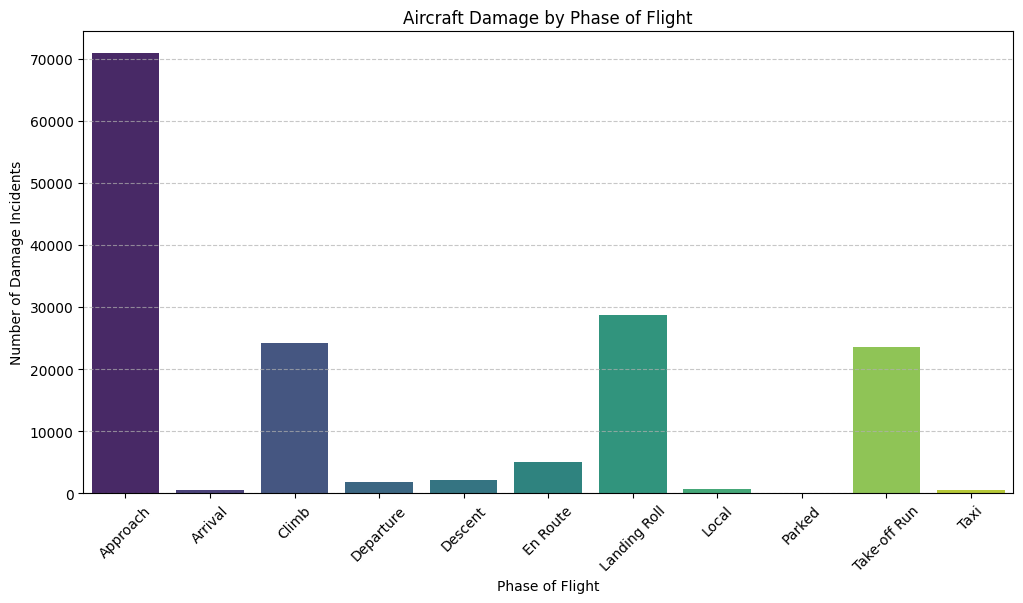

Chi-Square Statistic: 5070.97
P-value: 0.00
The differences in aircraft damage across flight phases are statistically significant (p < 0.05).


In [7]:
#4.3
# Drop missing values for aircraft damage and phase of flight
df_clean = df.dropna(subset=['PHASE_OF_FLIGHT', 'DAMAGE_LEVEL'])

# Count occurrences of aircraft damage for each phase of flight
damage_counts = df_clean.groupby('PHASE_OF_FLIGHT')['DAMAGE_LEVEL'].count()

# Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=damage_counts.index, y=damage_counts.values, palette="viridis")

# Titles and labels
plt.title("Aircraft Damage by Phase of Flight")
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Damage Incidents")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

# Create a contingency table for chi-square test
contingency_table = pd.crosstab(df_clean['PHASE_OF_FLIGHT'], df_clean['DAMAGE_LEVEL'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print chi-square test results
print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Evaluate significance
alpha = 0.05
if p_value < alpha:
    print("The differences in aircraft damage across flight phases are statistically significant (p < 0.05).")
else:
    print("There is NO statistically significant difference in aircraft damage across flight phases (p ≥ 0.05).")

### Key Findings  

1. The **Approach phase** has the highest number of aircraft damage incidents, followed by **Landing Roll, Take-off Run, and Climb**.  
2. **Phases like Taxi, Local, and Parked have very few damage incidents**, likely because aircraft are moving at lower speeds or stationary.  

### Chi-Square Test Results  

- **Chi-Square Statistic: 5070.97**  
- **P-value: 0.00**  

Since **p < 0.05**, we can conclude that the **differences in aircraft damage across flight phases are statistically significant**. This means that damage is not randomly distributed across phases but is influenced by when and how aircraft operate during flight.  

### Interpretation  

- **Approach and Landing Roll** phases involve lower altitudes and higher chances of bird strikes, making them more prone to damage.  
- **Take-off Run and Climb** also show notable damage, possibly due to engine ingestion of birds.  
- **En Route and Descent** have lower incidents, which makes sense as aircraft are at higher altitudes with fewer bird encounters.  

### Conclusion  

Aircraft damage is **strongly dependent on the phase of flight**, with **approach, landing roll, and takeoff being the most critical risk periods**. Airports and airlines should **focus on these phases** for bird strike prevention and aircraft protection strategies.  

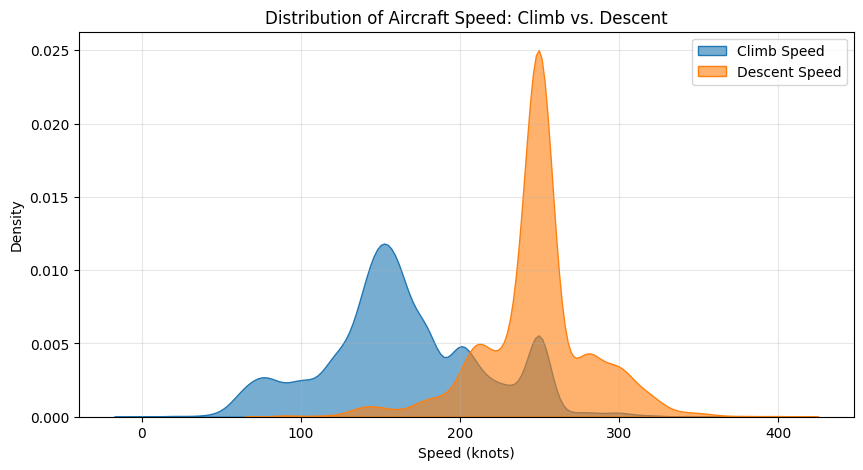

Null Hypothesis (H0): There is no significant difference in speed between Climb and Descent phases.
Alternative Hypothesis (H1): There is a significant difference in speed between Climb and Descent phases.
Mann-Whitney U Statistic: 1952322.50
P-value: 0.00
The difference in speed between Climb and Descent phases is statistically significant (p < 0.05).


In [8]:
#4.4
# Ensure 'SPEED' is numeric
df['SPEED'] = pd.to_numeric(df['SPEED'], errors='coerce')

# Filter data for climb and descent phases
climb_speeds = df[df['PHASE_OF_FLIGHT'] == 'Climb']['SPEED'].dropna()
descent_speeds = df[df['PHASE_OF_FLIGHT'] == 'Descent']['SPEED'].dropna()

# Plot distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(climb_speeds, label="Climb Speed", fill=True, alpha=0.6)
sns.kdeplot(descent_speeds, label="Descent Speed", fill=True, alpha=0.6)

# Titles and labels
plt.title("Distribution of Aircraft Speed: Climb vs. Descent")
plt.xlabel("Speed (knots)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

# State hypotheses
print("Null Hypothesis (H0): There is no significant difference in speed between Climb and Descent phases.")
print("Alternative Hypothesis (H1): There is a significant difference in speed between Climb and Descent phases.")

# Perform Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(climb_speeds, descent_speeds, alternative='two-sided')

# Print test results
print(f"Mann-Whitney U Statistic: {u_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Evaluate significance
alpha = 0.05
if p_value < alpha:
    print("The difference in speed between Climb and Descent phases is statistically significant (p < 0.05).")
else:
    print("There is NO statistically significant difference in speed between Climb and Descent phases (p ≥ 0.05).")

### What We Are Testing  

We are comparing aircraft speed during the **Climb** and **Descent** phases of flight. Since these two phases involve different aerodynamic and operational factors, it's important to see if their speed distributions are significantly different.  

The **Mann-Whitney U test** is used because speed data is not normally distributed, and this test is well-suited for comparing non-parametric data.  

### Hypotheses  

- **Null Hypothesis (H0):** There is no significant difference in speed between Climb and Descent phases.  
- **Alternative Hypothesis (H1):** There is a significant difference in speed between Climb and Descent phases.  

### Key Findings  

1. **The KDE plot shows a clear difference in distributions**  
   - Climb speeds (blue) are generally **lower and more spread out**.  
   - Descent speeds (orange) are **higher and more concentrated**, peaking around **250–300 knots**.  

2. **Statistical Test Results**  
   - **Mann-Whitney U Statistic:** 1,952,322.5  
   - **P-value:** 0.00 (very small)  

3. **Conclusion**  
   - Since **p < 0.05**, we **reject the null hypothesis**.  
   - This confirms that **aircraft speed during Climb and Descent is statistically different**.  

### Why This Is Useful  

- **Operational Insights:** Understanding speed variations can help pilots and air traffic controllers optimize climb and descent procedures for **efficiency and fuel savings**.  
- **Safety Measures:** If descent speeds are significantly higher, it may require **enhanced monitoring to ensure smooth landings**.  
- **Air Traffic Management:** Predicting speed behavior in different phases helps in **flight scheduling and runway usage planning**.  

The results confirm that aircraft operate at **distinct speed ranges** during Climb and Descent, reinforcing the need for different handling techniques in these phases.  


Question 5 — Statistical Modeling (20 points)

Explore a simple linear relationship* within the data and create a model to predict the occurrence of bird strikes in a given FAA region. Ensure that you explain all results.

1. Extract all data for the AWP FAA Region and use a line chart to visualize the frequency of incidents between 1990 and 2015 inclusive.
2. Using the extracted data above, create a simple linear regression model and predicts the incidents for 2016 and 2017.
Part 1) Display the r-squared and what this indicates about your model's ability to fit the data.
Part 2) Visualize the dataset from (1) and include the predicted results for 2016 and 2017.
Part 3) Compare and contrast the predictions for 2016 and 2017 with the actual values.
3. Perform predictions for 2018 through to 2020. Explain what transpired when your model was used to predict this time period. Comment on the reliability of your model.
*Tip: It is important to remember that you are creating a simple linear regression model, which is limited in features and does not include information about all factors that influence the frequency of bird strikes. Keep this in mind while framing your response and explanations.

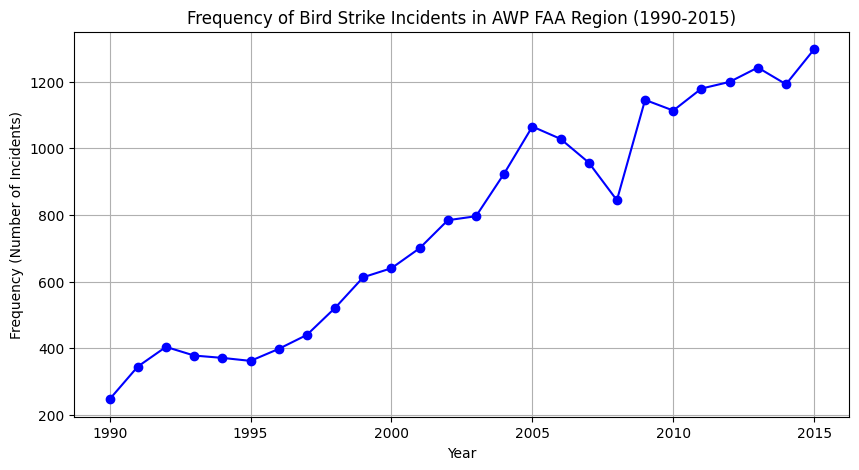

In [9]:
#5.1
# Filter for AWP FAA Region and incidents between 1990-2015
awp_data = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"].between(1990, 2015))]

# Count incidents per year
incidents_per_year = awp_data["INCIDENT_YEAR"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(incidents_per_year.index, incidents_per_year.values, marker='o', linestyle='-', color="blue")
plt.xlabel("Year")
plt.ylabel("Frequency (Number of Incidents)")
plt.title("Frequency of Bird Strike Incidents in AWP FAA Region (1990-2015)")
plt.grid(True)
plt.show()

This line plot shows a very strong positive trend that depicts that from 1990-2015, the frequency of incidents has more or less steadily increased, with the exception of a downward trend from 2005-2008. In the 25 years shown, the frequency has increased from less than 300 to almost 1400. This could indicate even higher numbers of incidents in years to come.

r-squared is:  0.96


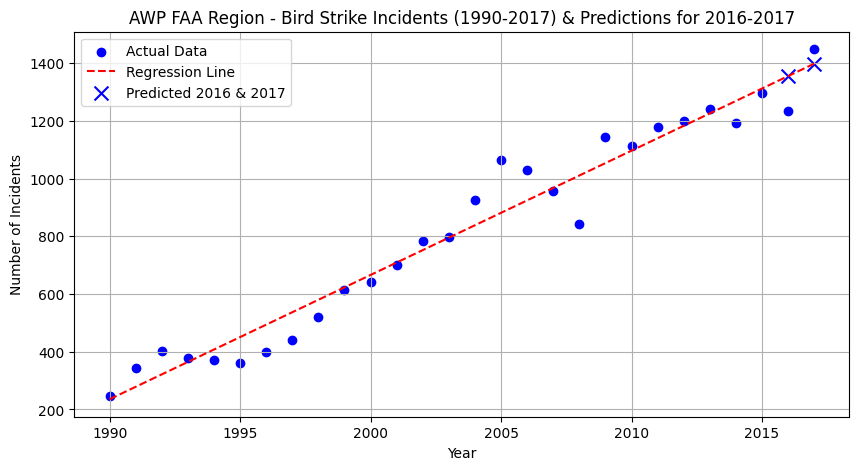

   Year    Predicted  Actual
0  2016  1354.873016    1235
1  2017  1397.928571    1448


In [10]:
#5.2

from sklearn.linear_model import LinearRegression

awp_data = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"].between(1990, 2017))]


X = awp_data["INCIDENT_YEAR"].value_counts().sort_index().index.values.reshape(-1, 1)
y = awp_data["INCIDENT_YEAR"].value_counts().sort_index().values

lr_model = LinearRegression(fit_intercept=True)
lr_model = lr_model.fit(X, y)

# Predict the incidents for 2016 and 2017
future_years = np.array([[2016], [2017]])
predictions = lr_model.predict(future_years)

# Display R-squared
r_sqrd = lr_model.score(X, y)
r_sqrd = round(r_sqrd, 2)
print('r-squared is: ', r_sqrd)

# Plot incidents from 1990-2015
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, lr_model.predict(X), color="red", linestyle="--", label="Regression Line")

# Plot predictions for 2016 and 2017
plt.scatter(future_years, predictions, color="blue", label="Predicted 2016 & 2017", marker="x", s=100)

# Labels & Legend
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("AWP FAA Region - Bird Strike Incidents (1990-2017) & Predictions for 2016-2017")
plt.legend()
plt.grid(True)
plt.show()

# Assuming df contains actual values for 2016 and 2017
actual_2016 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"] == 2016)].shape[0]
actual_2017 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"] == 2017)].shape[0]

# Display comparison
comparison_df = pd.DataFrame({
    "Year": [2016, 2017],
    "Predicted": predictions.flatten(),
    "Actual": [actual_2016, actual_2017]
})

print(comparison_df)

The r squared number being extremely close to 1 indicates that the relationship between the dependant and independant variables is very strong, showing a solid correlation between both variables because it means that the variance in the dependant variable can be explained well by the variance in the independant variable. It shows that there is a near-perfect fit between the model and the data.

Based on the comparison between the predicted frequency of incidents and the original frequency of incidents for the years 2016 and 2017, we see that the predictions, while not completely accurate, are somewhat similar to the actual numbers. In 2016, the predicted was 119 points higher than the actual number, signifying that this simple model does not consider all the factors that could've possibly affected the drop in incidents. In 2017, the predicted was 51 points lower than the original value, which is a more accurate estimation. Given that the model doesn't take all factors into consideration, the predicted values are not 100% accurate, but still follow a similar upward trend.


In [11]:
#5.3

# Predict incidents for 2018 to 2020
future_years_extended = np.array([[2018], [2019], [2020]])
predictions_extended = lr_model.predict(future_years_extended)

actual_2018 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"] == 2018)].shape[0]
actual_2019 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"] == 2019)].shape[0]
actual_2020 = df[(df["FAAREGION"] == "AWP") & (df["INCIDENT_YEAR"] == 2020)].shape[0]

predictions_extended = lr_model.predict(np.array([[2018], [2019], [2020]]))

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Year": [2018, 2019, 2020],
    "Predicted": predictions_extended.flatten(),
    "Actual": [actual_2018, actual_2019, actual_2020]
})

# Display comparison
print(comparison_df)

   Year    Predicted  Actual
0  2018  1440.984127    1591
1  2019  1484.039683    1620
2  2020  1527.095238    1142


For 2018-2020, the predicted frequencies are quite far from the actual numbers. While the predicted numbers show a consistent upward trend, the real frequencies show fluctuations that are not accounted by the predictions given that the model does not take other factors into consideration, thus the model is not completely reliable.

Question 6 — Summary

Summarize the overall analysis for questions 1 through 5 and share THREE (3) key findings.

(Summary of overall analysis for question 1 through 5 as key findings)
At the initial stages of this assignment, our initial exploratory data analysis revealed important temporal, seasonal, geographical, aircraft type, flight phase, and other patterns in bird strike incident frequency.

**Key Findings:** The frequency of accidents have increased steadily over time, with the exception of a downward trend in 2020 (which might have been due to covid), showing a linear connection between air travel and air accidents. The most bird strikes occur in Texas, Florida, and California, which made sense due to their high population and therefore higher number of flights. Additionally, the phase of flight having most aircraft damage was the Approach phase. In terms of seasonal patterns, our analysis revealed that most bird strikes happen from May to October with peaks in July and August, probably due to migration and more flights, compared to winter months where birds are less active. Lastly, we found that the Type A aircraft dominates bird strikes, which could indicate that it is likely a high-traffic commercial plane. This means that it is in the air more often, increasing strike chances, and therefore needs better bird strike mitigation.


The second stage of our analysis involved conducting statistical tests of specific features to reveal the relationship between factors like speed, height, and aircraft phases.

**Key Findings:** There is a moderate to strong positive correlation between aircraft height and speed, indicating that as height increases, speed also tends to increase. Secondly, our analysis revealed that there was a statistical difference between the speed of the approach phase and landing roll phase, meaning that aircraft speeds during approach and landing roll are not similar and are likely affected by different operational factors. Lastly, the Approach phase has the highest number of aircraft damage incidents, followed by Landing Roll, Take-off Run, and Climb. The differences in aircraft damage across flight phases are statistically significant, meaning that damage is not randomly distributed across phases but is influenced by when and how aircrafts operate during flight.


Our last part of our analysis involved developing a simple linear regression model to predict flight incident frequency for the AWP region.

**Key Finding:** The predictions made by the model for the years 2016-2020, were not too accurate, signifying that in order to improve the model, more factors needed to be considered that could influence flight incidents.

Question 7 — OPTIONAL (10 points)

This optional bonus question requires that you perform a geospatial analysis on bird strikes and visualize the results using a map. Examples include (but you are not limited to):

1. Mapping bird strike incidents: visualize the locations of bird strike incidents to identify hot spots or patterns
2. Heat maps: create heat maps to show the density of bird strike incidents in different areas.
3. Proximity Analysis: analyze the proximity of bird strikes to airports or landmarks
etc
<br>Ensure that you clearly indicate the analysis that you are performing and provide detailed steps to explain ALL findings from your analysis.

Note: a thorough analysis that demonstrates multiple patterns is required to earn full credit for this question.

<b>Due to the large amount of data, time it takes to run only the current subset of 100 locations (~6 minutes), and restriction of not being able to get more than 1 geocoord per second, we have decided to do an analysis on only a subset of the bird strike locations (100 locations)</b>

In [12]:
import geopandas as gpd
import folium
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut, GeocoderServiceError
import time


geolocator = Nominatim(user_agent="bird-strikes-analysis")

# Looking at the data for location (where the bird strikes happened),
# the location provided come in the forms:
# - City, State - FOUND AT XYZ - airport code - address - directional - state to state

# Function to extract the third word after 'FOUND AT'
def extract_location_after_found_at(location):
    location = str(location)
    try:
        if "FOUND AT" in location:
            words = location.split()
            if len(words) > 2:
                return " ".join(words[2:])  # Return everything after 'FOUND AT'
    except Exception as e:
        return None
    return None

# Function to get coordinates from an address, airport code, and City, State format
def get_coordinates_from_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        return None
    except Exception as e:
        return None
    return None

# Function to get coordinates for place descriptions like '7 MI S BIG LAKE'
def get_place_coordinates(description):
    try:
        words = description.split()
        # Extract everything after the third word to only get city
        place_description = " ".join(words[3:])

        location = geolocator.geocode(place_description)
        if location:
            return location.latitude, location.longitude
    except (GeocoderTimedOut, GeocoderServiceError) as e:
        return None
    except Exception as e:
        return None
    return None

# Function to determine the type of LOCATION and fetch coordinates accordingly
def get_coordinates(location):
    location = str(location)

    # Otherwise, compute the coordinates
    if "FOUND AT" in location:  # case for "FOUND AT"
        airport_code = extract_location_after_found_at(location)
        return get_coordinates_from_address(airport_code)
    elif location[0].isdigit() and len(location) > 4:
        if location[2:4] == "MI":  # "case for directional"
            return get_place_coordinates(location)
        else:
            return get_coordinates_from_address(location)
    elif " TO " in location:  # Look for the ' TO ' in the location string
        places = location.split(" TO ")
        if len(places) == 2:  # Ensure only two places: from and to
            # Get the coordinates for both places
            coords1 = get_coordinates(places[0].strip())
            coords2 = get_coordinates(places[1].strip())
            if coords1 and coords2:
                avg_lat = (coords1[0] + coords2[0]) / 2
                avg_lon = (coords1[1] + coords2[1]) / 2
                return (avg_lat, avg_lon)
    else:  # case for address, airport code, and city, state format
        return get_coordinates_from_address(location)

# First, drop rows where LOCATION is empty
df_cleaned = df[df['LOCATION'].notna()]

# Create a new DataFrame to store coordinates
df_coordinates = pd.DataFrame(columns=["LOCATION", "LATITUDE", "LONGITUDE"])

# Apply `get_coordinates` to each LOCATION entry and store results in a new DataFrame
# Only get 100 locations. Reasoning in markdown above
max_points = 100
count = 0
for index, row in df_cleaned.iterrows():
  if count >= max_points:
    break

  coords = get_coordinates(row['LOCATION'])
  if coords:
      new_row = pd.DataFrame([{
          "LOCATION": row['LOCATION'],
          "LATITUDE": coords[0],
          "LONGITUDE": coords[1]
      }])

      df_coordinates = pd.concat([df_coordinates, new_row], ignore_index=True)
      count+=1
  time.sleep(2) # add delay to prevent read timeout error

# Clean the new DataFrame to drop rows with missing LATITUDE or LONGITUDE values
df_coordinates_clean = df_coordinates.dropna(subset=["LATITUDE", "LONGITUDE"])
# print(df_coordinates.head())
print(df_coordinates_clean.head())

# Convert data to GeoDataFrame to be used for mapping
gdf = gpd.GeoDataFrame(df_coordinates_clean,
                        geometry=gpd.points_from_xy(df_coordinates_clean["LONGITUDE"], df_coordinates_clean["LATITUDE"]),
                        crs="EPSG:4326")

# Create a Folium Map centered on the average coordinates of the data
m = folium.Map(location=[df_coordinates_clean["LATITUDE"].mean(), df_coordinates_clean["LONGITUDE"].mean()], zoom_start=6)

# Add points to the map
for _, row in df_coordinates_clean.iterrows():
    folium.CircleMarker(
        location=[row["LATITUDE"], row["LONGITUDE"]],
        radius=3,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

# Display the map
m

<ipython-input-12-bd903112d2c5>:103: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_coordinates = pd.concat([df_coordinates, new_row], ignore_index=True)


             LOCATION   LATITUDE   LONGITUDE
0     7 MI S BIG LAKE  31.195474 -101.459275
1       FOUND AT KBHM  33.563496  -86.751527
2       FOUND AT KORD  41.978252  -87.909236
3       FOUND AT KBTR  30.531974  -91.150424
4  19 SE WATERTOWN SD  44.899211  -97.115289


Based on the map on a subset of 100 bird strike locations, where each red dot represents a bird strike location, most bird strikes occur in the United States. Specifically, a majority occur in the East and South East of the United States. The largest clusters of bird strikes occur near New York and Louisiana, which makes sense since JFK airport is in New York and there are a lot of flights there. Louisiana might also have a lot of bird strikes because it may also be a large airport with lots of flights that occur there.

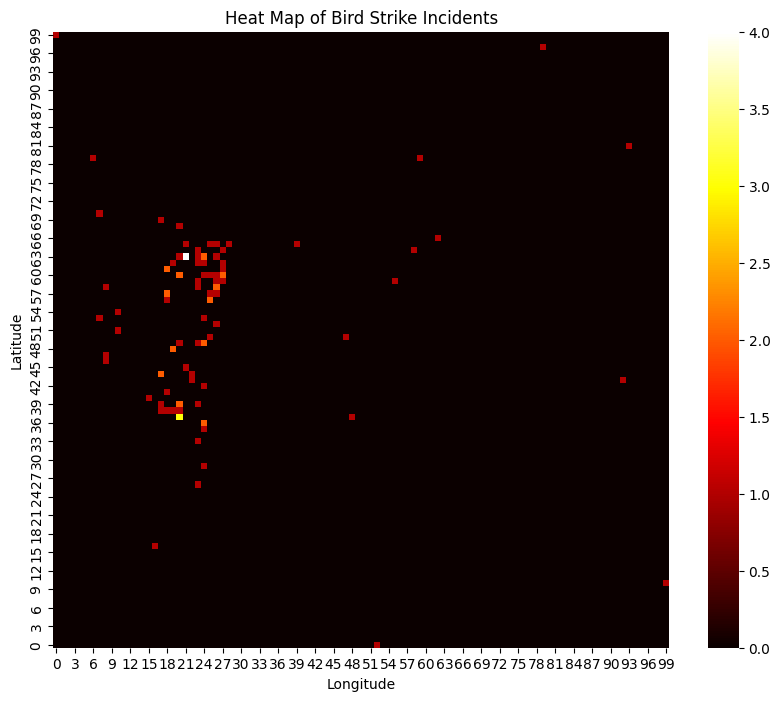

In [13]:
grid_size = 100

# Create a 2D histogram of lat/lon occurrences
heatmap_data, xedges, yedges = np.histogram2d(
    df_coordinates_clean["LONGITUDE"],
    df_coordinates_clean["LATITUDE"],
    bins=grid_size
)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap="hot", cbar=True, square=True)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Heat Map of Bird Strike Incidents")
plt.gca().invert_yaxis()
plt.show()

This is a heat map of bird strike incidents where darker colors reprsent less incidents and lighter colors represent more incidents as described by the legend on the right. The longitude is represented by the x-axis and the latitude by the y-axis. Based on the heatmap, the most bird strike incidents occur in (19.5, 36), which is roughly the city of New Orlean in Louisiana. The second most bird strike incidents occur in (21, 63), which is roughly the city of Chicago in Illinois. There are also many orange points clustered around longitude of 22-28 with latitude of 54-63 which roughly represents New York, Philadelphia, and Washington D.C.

By looking at where the most common bird strike incidents are occuring on the heat map (the white, yellow, and orange points) and mapping those points onto the world view map of where these incidents are occuring, it seems that most bird strike incidents are occuring near airports. For example, in the cluster of orange points near Washington D.C. and New York, major airports such as Ronald Reagan Washington National Airport and John F. Kennedy International Airport are near those locations. Similarly the white spot representing the a very high amount of bird strike incidents occured in Chicago, which has two major airports near each other: O'Hare International Airport and Chicago Midway International Airport. This makes sense since there are two major airports near each other, which would mean a high amount of flight traffic, thus a higher amount of bird strike incidents. Finally, for the yellow point representing the second most amount of bird strike incidents in this subset, it occured in New Orleans, which also has a major airport nearby: Louis Armstrong New Orleans International Airport.

Thus, it seems that most bird strike incidents occcur near airports as that is where the most air traffic occurs since airplanes need to lift-off and land at airports, so there is a higher likelihood of bird strike incidents.